In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv("../data/dataset/train/train.csv")
audio_df = pd.read_csv("../data/dataset/train/train_audio.csv")
visual_df = pd.read_csv("../data/dataset/train/train_visual.csv")

In [ ]:
def convert_duration_to_seconds(duration):
    pattern = r'PT(\d+H)?(\d+M)?(\d+S)?'
    hours, minutes, seconds = re.match(pattern, duration).groups()
    
    total_seconds = 0
    if hours:
        total_seconds += int(hours[:-1]) * 3600
    if minutes:
        total_seconds += int(minutes[:-1]) * 60
    if seconds:
        total_seconds += int(seconds[:-1])
    
    return total_seconds

duration = df['duration'].apply(convert_duration_to_seconds)
print(duration)

## Duration Blues
### How much does Duration affect our outputs?
First we'll look at the spread of duration, in seconds.

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16224\3441517061.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=duration, y=duration.index, palette=cmap)


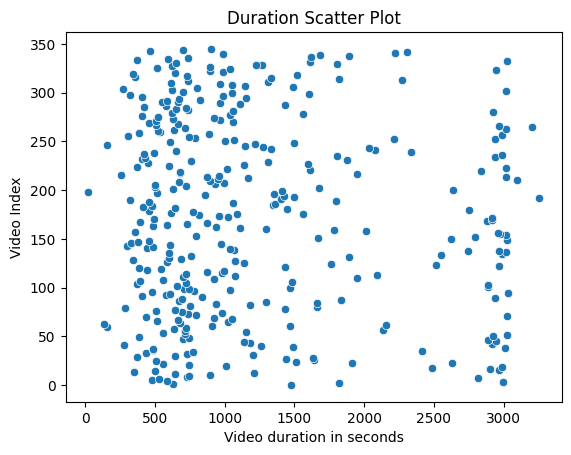

In [30]:
cmap_name = 'viridis'
cmap = plt.get_cmap(cmap_name)

sns.scatterplot(x=duration, y=duration.index, palette=cmap)

plt.title("Duration Scatter Plot")
plt.xlabel("Video duration in seconds")
plt.ylabel("Video Index")

plt.show()

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16224\2977669173.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=duration, bins=bin_edges, kde=True, palette="muted")


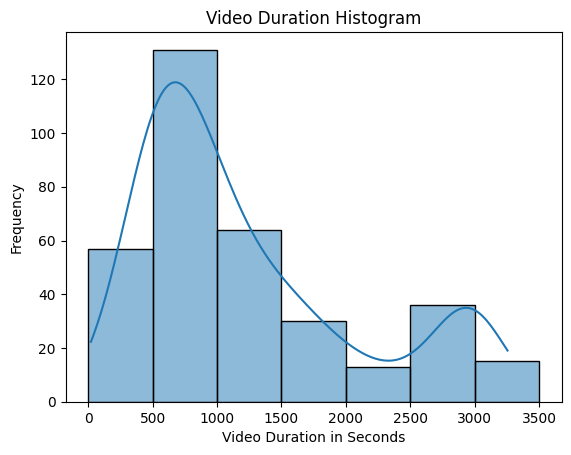

In [28]:
bin_edges = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]

sns.histplot(data=duration, bins=bin_edges, kde=True, palette="muted")

plt.title("Video Duration Histogram")
plt.xlabel("Video Duration in Seconds")
plt.ylabel("Frequency")

plt.show()

Now we can look at the relationship between duration and likes per view

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16224\4142776085.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x=duration, y=df['likes_per_view'], palette="viridis", kind='scatter')
c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


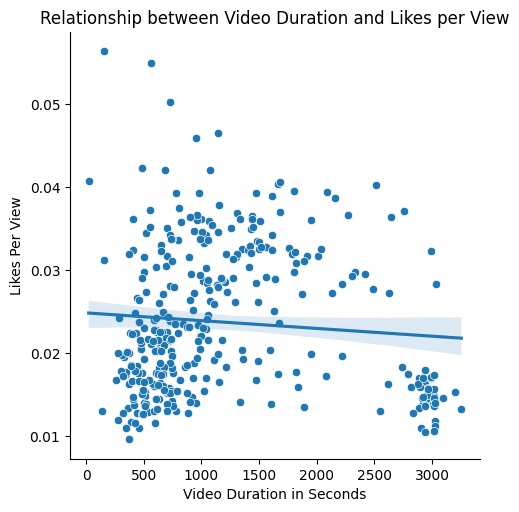

In [34]:
g = sns.relplot(x=duration, y=df['likes_per_view'], palette="viridis", kind='scatter')
sns.regplot(x=duration, y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Video Duration and Likes per View")
plt.xlabel("Video Duration in Seconds")
plt.ylabel("Likes Per View")

plt.show()

And then finally, looking at duration vs views per week

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16224\3640655733.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x=duration, y=df['views_per_week'], palette="viridis", kind='scatter')
c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


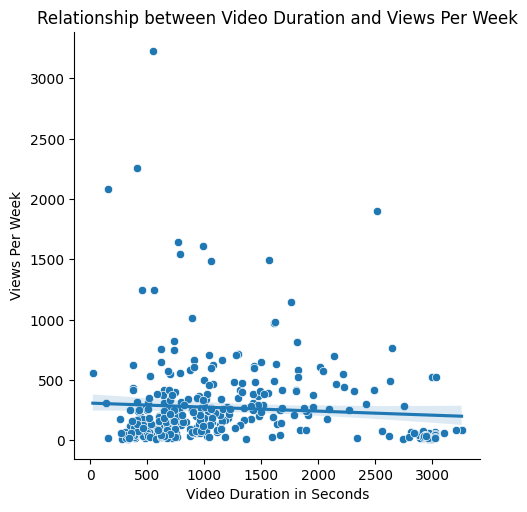

In [36]:
g = sns.relplot(x=duration, y=df['views_per_week'], palette="viridis", kind='scatter')
sns.regplot(x=duration, y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Video Duration and Views Per Week")
plt.xlabel("Video Duration in Seconds")
plt.ylabel("Views Per Week")

plt.show()

## Duration hypothesis, tested with null model
### Hypothesis: Likes per view is lower when the video is less than 10 minutes or longer than 40 minutes, and higher otherwise
To test this prediction I will be doing a null model hypothesis for the likes per view of videos in these three ranges, and then comparing them

In [46]:
df['duration_in_seconds'] = duration
null_under_10 = df.loc[df['duration_in_seconds'] < 600, 'likes_per_view'].mean()*100
null_over_40 = df.loc[df['duration_in_seconds'] > 2400, 'likes_per_view'].mean()*100
null_between = df.loc[(df['duration_in_seconds'] > 600) & (df['duration_in_seconds'] < 2400), 'likes_per_view'].mean()*100

print(f'The average likes per view for videos less than 10 minutes long is {null_under_10}%')
print(f'The average likes per view for videos longer than 40 minutes long is {null_over_40}%')
print(f'The average likes per view for videos between 10 and 40 minutes long is {null_between}%')

The average likes per view for videos less than 10 minutes long is 2.095611365119467%
The average likes per view for videos longer than 40 minutes long is 1.7516747384990181%
The average likes per view for videos between 10 and 40 minutes long is 2.634107794215827%


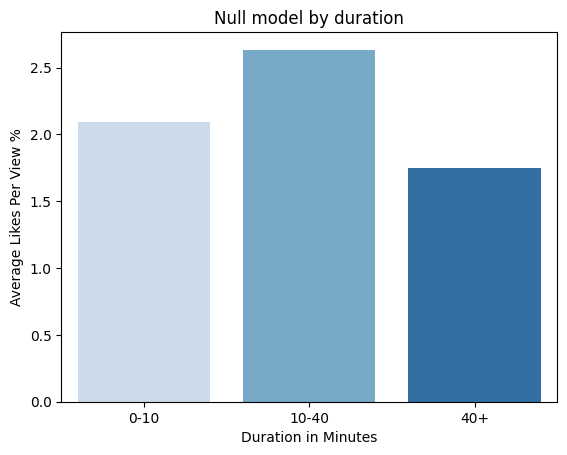

In [48]:
values = [null_under_10, null_between, null_over_40]
duration_range = ['0-10', '10-40', '40+']
data = { 'Average Likes Per View' : values,
        'Duration in Minutes' : duration_range }
temp_df = pd.DataFrame(data)

sns.barplot(x='Duration in Minutes', y='Average Likes Per View', data=temp_df, palette="Blues")

plt.title("Null model by duration")
plt.xlabel("Duration in Minutes")
plt.ylabel("Average Likes Per View %")

plt.show()

## Comments, behind the curtain
### How much does Comments contribute to our Outputs?
In this portion, I'll be analysing the spread of comments and seeing how much it correlates to likes per view and views per week. Comments were one of the features that formed part of the most successful models up until this point, so seeing how much it contributed helps me understand the model much better. In all fairness, it's predictable that an increase in comments will lead to an increase in like per view, but this isn't necessarily data that we'd have for a given video. Or it's at least not the sort of data we want to predict on.

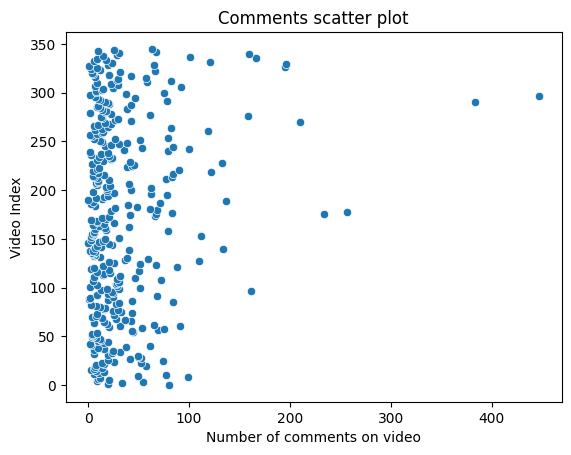

In [49]:
sns.scatterplot(x=df['comments'], y=df.index)

plt.title("Comments scatter plot")
plt.xlabel("Number of comments on video")
plt.ylabel("Video Index")

plt.show()

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16224\627837013.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df['comments'], bins=bin_edges, kde=True, palette="muted")


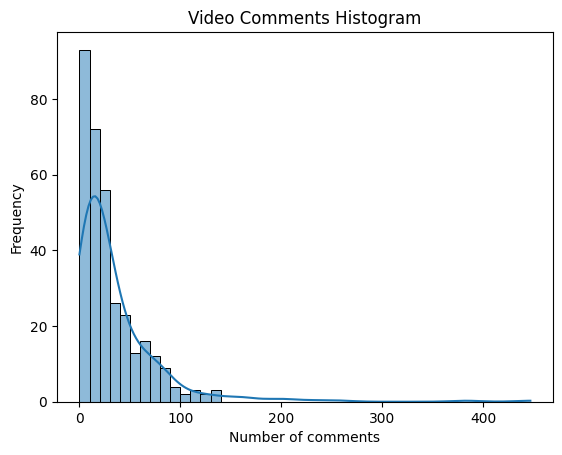

In [53]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

sns.histplot(data=df['comments'], bins=bin_edges, kde=True, palette="muted")

plt.title("Video Comments Histogram")
plt.xlabel("Number of comments")
plt.ylabel("Frequency")

plt.show()

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16224\1053091397.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x=df['comments'], y=df['likes_per_view'], palette="viridis", kind='scatter')
c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


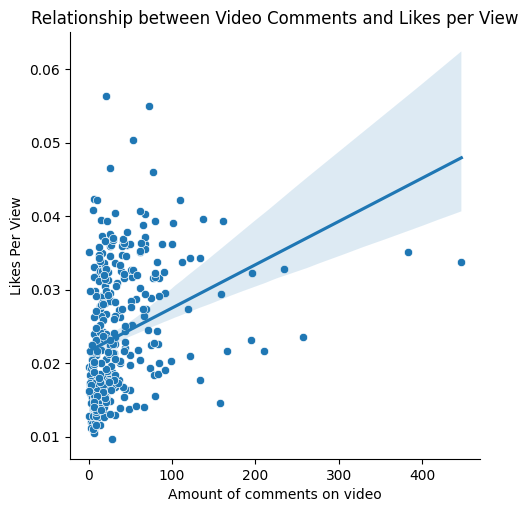

In [54]:
g = sns.relplot(x=df['comments'], y=df['likes_per_view'], palette="viridis", kind='scatter')
sns.regplot(x=df['comments'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Video Comments and Likes per View")
plt.xlabel("Amount of comments on video")
plt.ylabel("Likes Per View")

plt.show()

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16224\721567581.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x=df['comments'], y=df['views_per_week'], palette="viridis", kind='scatter')
c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


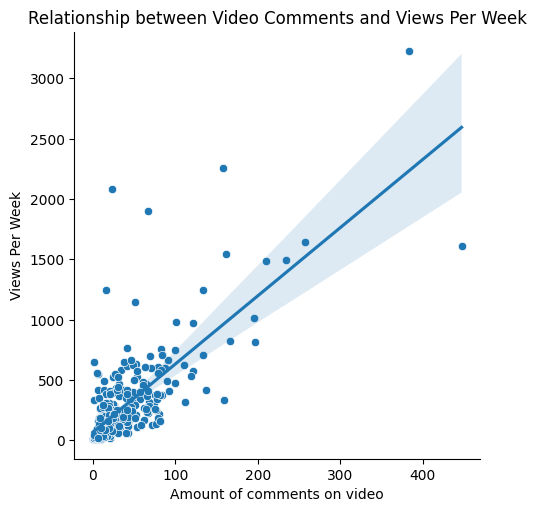

In [55]:
g = sns.relplot(x=df['comments'], y=df['views_per_week'], palette="viridis", kind='scatter')
sns.regplot(x=df['comments'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Video Comments and Views Per Week")
plt.xlabel("Amount of comments on video")
plt.ylabel("Views Per Week")

plt.show()

## Elapsed Weeks
### Elapsed Weeks should have a simple linear effect on the output

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


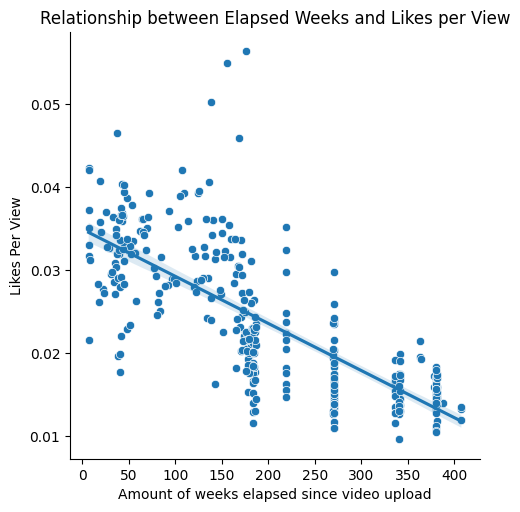

In [57]:
g = sns.relplot(x=df['elapsed_weeks'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['elapsed_weeks'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Elapsed Weeks and Likes per View")
plt.xlabel("Amount of weeks elapsed since video upload")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


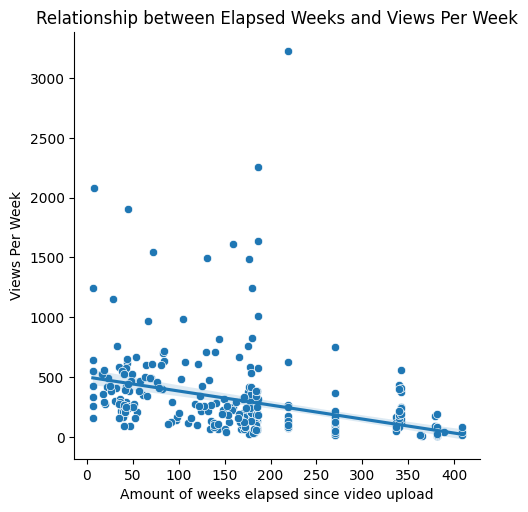

In [58]:
g = sns.relplot(x=df['elapsed_weeks'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['elapsed_weeks'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Elapsed Weeks and Views Per Week")
plt.xlabel("Amount of weeks elapsed since video upload")
plt.ylabel("Views Per Week")

plt.show()

## Speech Processing Analaysis
### Looking at the effects of pitch range and speech rate

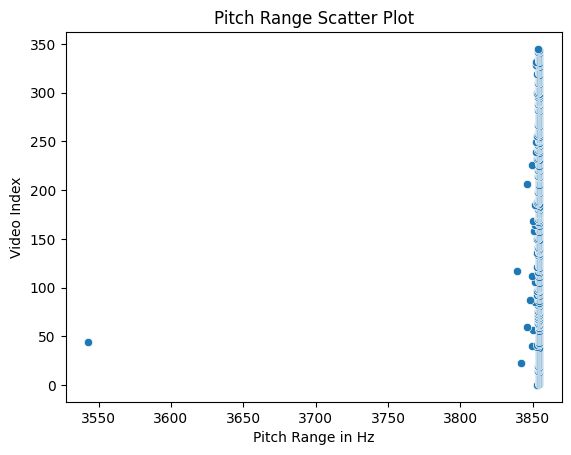

In [59]:
sns.scatterplot(x=audio_df['pitch_range'], y=audio_df.index)

plt.title("Pitch Range Scatter Plot")
plt.xlabel("Pitch Range in Hz")
plt.ylabel("Video Index")

plt.show()

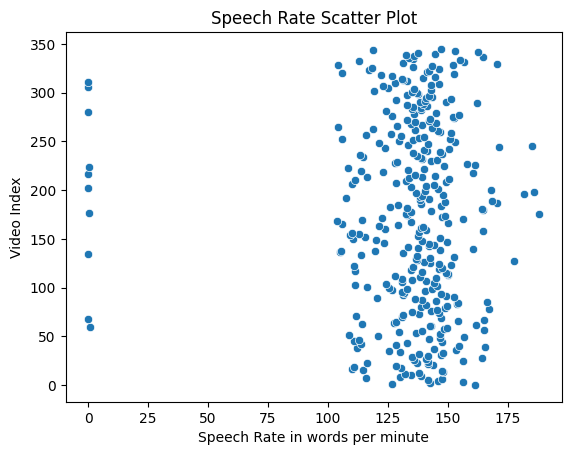

In [60]:
sns.scatterplot(x=audio_df['speech_rate'], y=audio_df.index)

plt.title("Speech Rate Scatter Plot")
plt.xlabel("Speech Rate in words per minute")
plt.ylabel("Video Index")

plt.show()

In [62]:
df['speech_rate'] = audio_df['speech_rate']
df['pitch_range'] = audio_df['pitch_range']

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


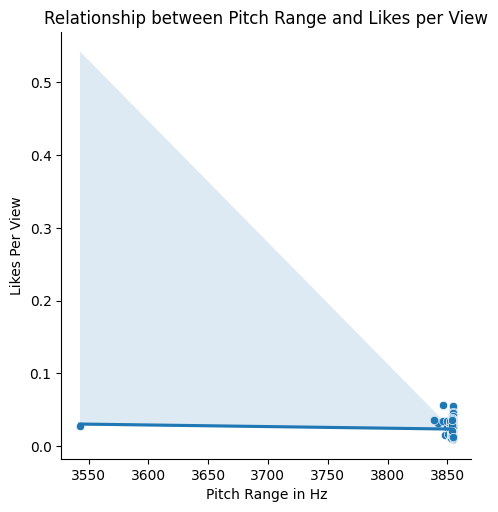

In [64]:
g = sns.relplot(x=df['pitch_range'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['pitch_range'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Pitch Range and Likes per View")
plt.xlabel("Pitch Range in Hz")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


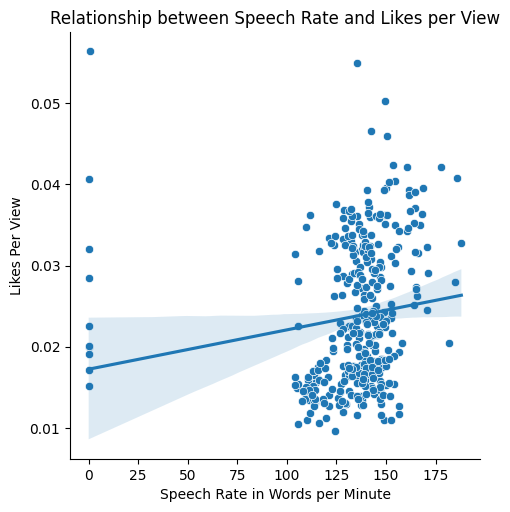

In [65]:
g = sns.relplot(x=df['speech_rate'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['speech_rate'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Speech Rate and Likes per View")
plt.xlabel("Speech Rate in Words per Minute")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


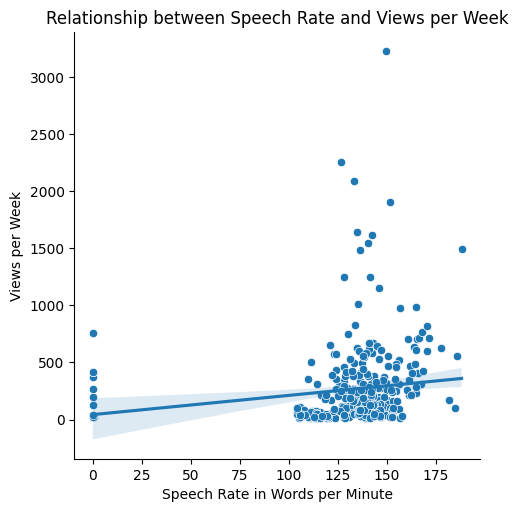

In [66]:
g = sns.relplot(x=df['speech_rate'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['speech_rate'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Speech Rate and Views per Week")
plt.xlabel("Speech Rate in Words per Minute")
plt.ylabel("Views per Week")

plt.show()

## Visual Processing Analysis
### Colorfulness index was processed from the training data, and that is investigated here

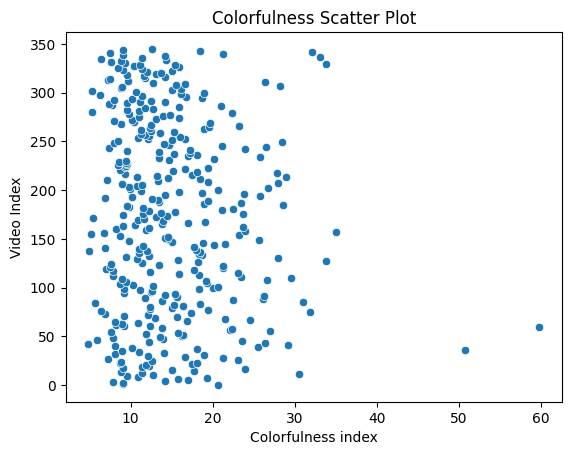

In [68]:
sns.scatterplot(x=visual_df['colorfulness'], y=visual_df.index)

plt.title("Colorfulness Scatter Plot")
plt.xlabel("Colorfulness index")
plt.ylabel("Video Index")

plt.show()

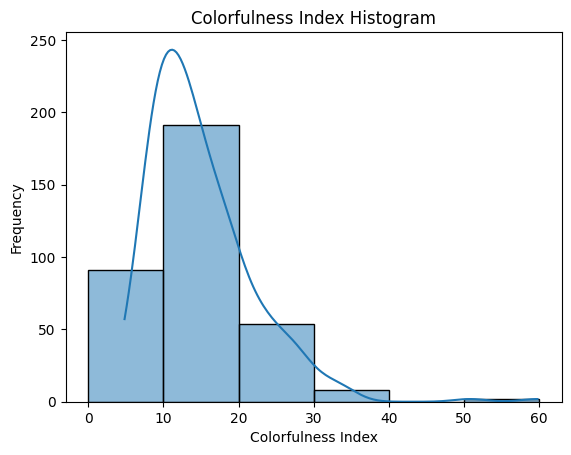

In [71]:
bin_edges = [0, 10, 20, 30, 40, 50, 60]

sns.histplot(data=visual_df['colorfulness'], bins=bin_edges, kde=True)

plt.title("Colorfulness Index Histogram")
plt.xlabel("Colorfulness Index")
plt.ylabel("Frequency")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


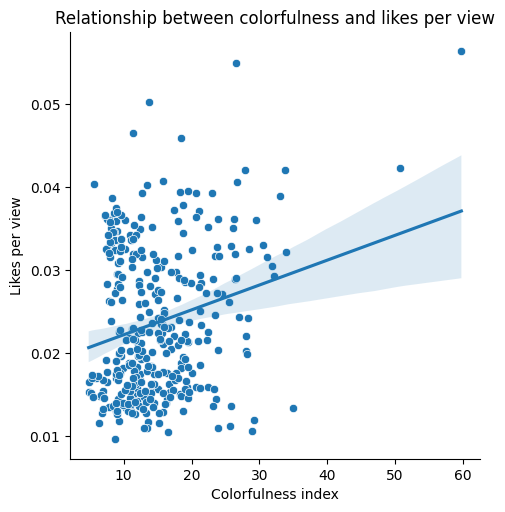

In [72]:
df['colorfulness'] = visual_df['colorfulness']
g = sns.relplot(x=df['colorfulness'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['colorfulness'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between colorfulness and likes per view")
plt.xlabel("Colorfulness index")
plt.ylabel("Likes per view")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


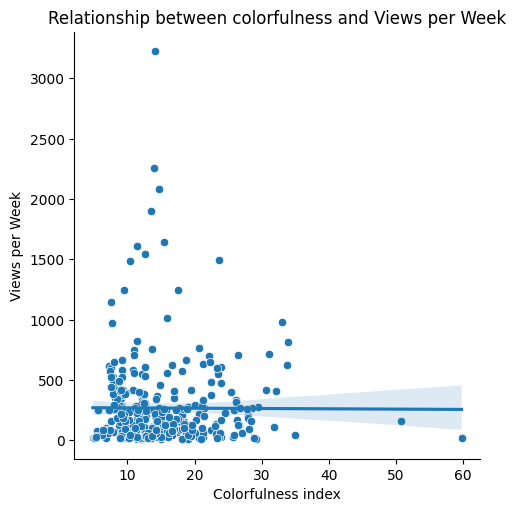

In [73]:
df['colorfulness'] = visual_df['colorfulness']
g = sns.relplot(x=df['colorfulness'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['colorfulness'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between colorfulness and Views per Week")
plt.xlabel("Colorfulness index")
plt.ylabel("Views per Week")

plt.show()